In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## 1.Data Preprocessing

In [2]:
#Using the os library, we can fetch all the files in a particular directory.
# path='/Users/jaykay/Desktop/Data Analytics Projects using Python/Data Analytics Project -Python/5-Sales Data Analysis/Sales_Data'
# files=[file for file in os.listdir(path)]
# files

In [3]:
#I wan to print each file
# for file in files:
#     print(file)

In [4]:
# all_data2=pd.DataFrame()
# for file in files:
#     current_df=pd.read_csv(path+'/'+file)
#     all_data2=pd.concat([all_data2,current_df])
    
# all_data2.shape
     

In [5]:
#We can save this all_data2 file to csv
# all_data2.to_csv(path+'/'+'all_data2.csv',index=False)

In [6]:
path='/Users/jaykay/Desktop/Data Analytics Projects using Python/Data Analytics Project -Python/5-Sales Data Analysis/Sales_Data'
sales_data=pd.read_csv(path+'/'+'all_data.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
sales_data.shape

(186850, 6)

## 2.Analyzing Monthly Sales
### What is the Best Month of Sales

In [8]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [11]:
#Lets drop all the missing values
sales_data.dropna(how='all',inplace=True)
sales_data.shape

(186305, 6)

In [12]:
#We can get the month by splitting
'04/19/19 08:46'.split('/')[0]

'04'

In [13]:
def yodanu(x):
    return x.split('/')[0]

In [14]:
sales_data['Month']=sales_data['Order Date'].apply(yodanu)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
#Lets put the Month after the Order Date
sales_data.insert(5,'Order Month',sales_data['Order Date'].apply(yodanu),True)
sales_data.drop('Month',axis=1,inplace=True)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,04,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,04,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,04,"333 8th St, Los Angeles, CA 90001"


In [16]:
#Note that we arent able to convert the month column to an integer because of this:
sales_data['Order Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [18]:
#Lets remove this by doing a negation filter
filter=sales_data['Order Month']=='Order Date'
sales_data=sales_data[~filter]

In [19]:
sales_data['Order Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [22]:
#Now we can now successfully convert this to an integer
sales_data['Order Month']=sales_data['Order Month'].astype(int)

In [23]:
sales_data['Order Month'].dtypes

dtype('int64')

In [25]:
#Now lets create the sales column by multiplying the quantity ordered and price column.
#We have to convert them to an integer first.
sales_data['Quantity Ordered']=sales_data['Quantity Ordered'].astype(int)
sales_data['Price Each']=sales_data['Price Each'].astype(float)

In [26]:
sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Order Month           int64
Purchase Address     object
dtype: object

In [27]:
sales_data['sales']=sales_data['Quantity Ordered']*sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",11.99


In [29]:
#Now lets get our best month
monthly_sales=sales_data.groupby('Order Month')['sales'].sum()
monthly_sales

Order Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

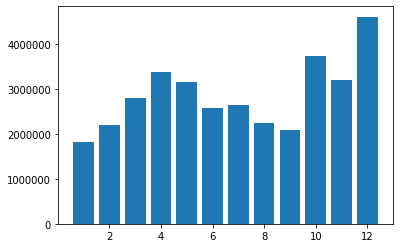

In [30]:
#Lets visualize it now

months=range(1,13)
plt.bar(months,monthly_sales)
plt.show()

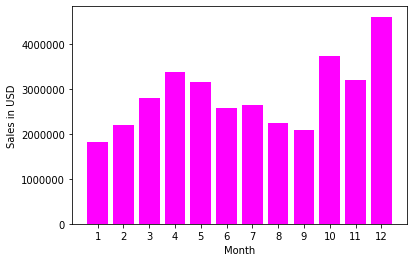

In [35]:
#lets put the xsticks and see what it does

months=range(1,13)
plt.bar(months,monthly_sales,color='magenta')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.xticks(months)
plt.show()

In [53]:
month=sales_data['Order Date'].dt.strftime('%B')

In [54]:
sales_data.insert(7,'Order Month 2',month,True)

In [58]:
month2=sales_data.groupby('Order Month 2')['sales'].sum()
month2

Order Month 2
April        3.390670e+06
August       2.244468e+06
December     4.613443e+06
February     2.202022e+06
January      1.822257e+06
July         2.647776e+06
June         2.577802e+06
March        2.807100e+06
May          3.152607e+06
November     3.199603e+06
October      3.736727e+06
September    2.097560e+06
Name: sales, dtype: float64

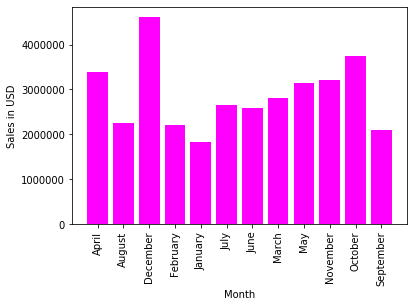

In [63]:
plt.bar(month2.index,month2,color='magenta')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.xticks(rotation='vertical')
plt.show()

## 3.Which City has the highest order

In [36]:
#Investigating our dataset, we will see that there is no column city.
#But the city can be gotten from Purchase Address column.

def city(x):
    return x.split(',')[1]

In [37]:
sales_data.insert(6,'City',sales_data['Purchase Address'].apply(city),True)

In [38]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,City,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,Dallas,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,Boston,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,Los Angeles,"333 8th St, Los Angeles, CA 90001",11.99


In [39]:
sales_data['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [41]:
sales_data['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

In [43]:
#We can also do a groupby too
sales_data.groupby('City')['City'].count()

City
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: City, dtype: int64

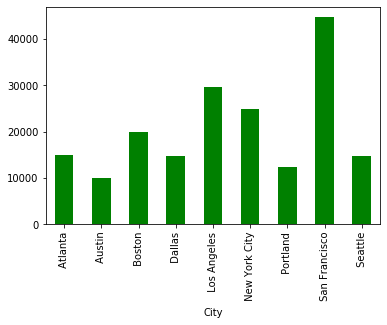

In [46]:
#Visualizing this, we have
sales_data.groupby('City')['City'].count().plot(kind='bar',color='green')
plt.show()

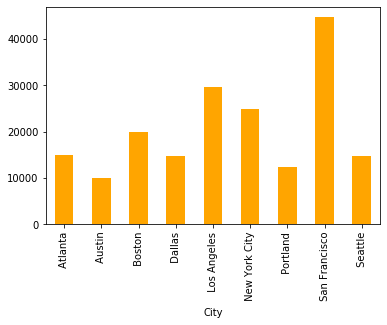

In [48]:
#We can also say
sales_data.groupby('City')['City'].count().plot.bar(color='orange')
plt.show()

## 4.	What time is the sales of product maximum?
 

In [49]:
#We have to fetch the time from the order date column.
#But first,lets convert that to datetime
sales_data['Order Date']=pd.to_datetime(sales_data['Order Date'])

In [50]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,City,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,Dallas,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,Boston,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,Los Angeles,"333 8th St, Los Angeles, CA 90001",11.99


In [51]:
sales_data.insert(6,'Order Hour',sales_data['Order Date'].dt.hour,True) #Note,Order hour is time

In [52]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Order Hour,City,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,8,Dallas,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,22,Boston,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,14,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,14,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,9,Los Angeles,"333 8th St, Los Angeles, CA 90001",11.99


In [64]:
hours=[] #We append our hours here
sales_hour=[] #We append sales at that particular hour

for key,hour_df in sales_data.groupby('Order Hour'):
    hours.append(key)
    sales_hour.append(len(hour_df))

In [65]:
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [66]:
sales_hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

In [69]:
sales_hour_df=pd.DataFrame(zip(hours,sales_hour))
sales_hour_df.columns=['Order Time','Sales per Time']

In [70]:
sales_hour_df

,Order Time,Sales per Time
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


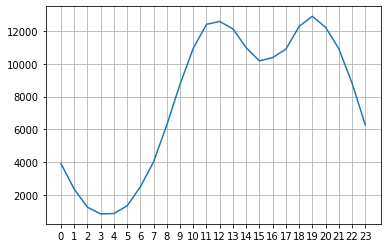

In [75]:
plt.plot(hours,sales_hour)
plt.grid()
plt.xticks(hours)
plt.show()

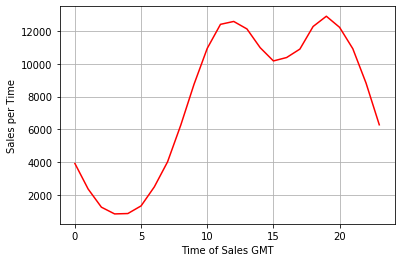

In [83]:
#or
plt.plot(sales_hour_df['Order Time'],sales_hour_df['Sales per Time'],color='red')
plt.grid()
plt.xlabel('Time of Sales GMT')
plt.ylabel('Sales per Time')
plt.show()

## 5.What product sold the most and why?

In [89]:
sold_products=sales_data.groupby('Product')['Quantity Ordered'].sum()
sold_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

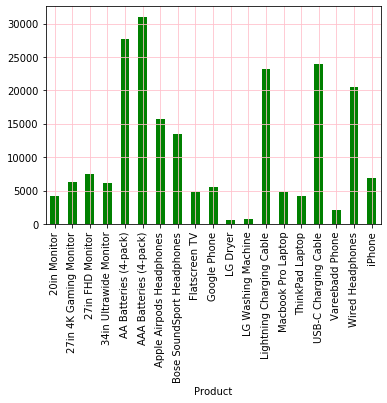

In [92]:
sold_products.plot(kind='bar',color='green')
plt.grid(color='pink')
plt.show()

In [93]:
#Now lets analyze why AAA Batteries has highest quantity sold
sales_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [94]:
#From the above, we see that AAA Bateries has the lowest average price hence the more product sold.

In [95]:
#Lets visualize this on a subplot now.
products=sales_data.groupby('Product')['Quantity Ordered'].sum().index
Quantity=sales_data.groupby('Product')['Quantity Ordered'].sum()
avg_price=sales_data.groupby('Product')['Price Each'].mean()

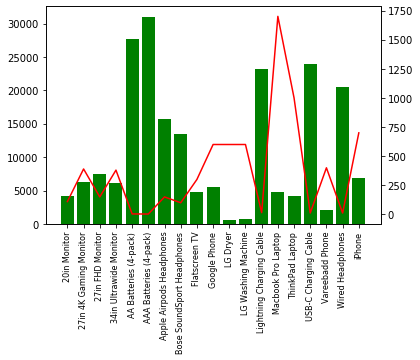

In [102]:
fig,ax1=plt.subplots() #It automatically takes row 1 and columns 1 i.e 1,1
ax2=ax1.twinx() #twinx means shearing same axis with ax1

ax1.bar(products,Quantity,color='g')
ax2.plot(products,avg_price,color='r')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

## 6.What Products are most often sold together


In [106]:
#This means orders that have same order id, those are products sold together.
dup_df=sales_data['Order ID'].duplicated(keep=False)
dup_df2=sales_data[dup_df]
dup_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Order Hour,Order Month 2,City,Purchase Address,sales
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,14,April,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,14,April,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",11.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,4,19,April,Los Angeles,"20 Hill St, Los Angeles, CA 90001",600.00
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,4,19,April,Los Angeles,"20 Hill St, Los Angeles, CA 90001",11.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,11,April,Boston,"823 Highland St, Boston, MA 02215",99.99


In [107]:
#Now, we have to group those products with same orders together
dup_df2['grouped products']=dup_df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
dup_df2.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Order Hour,Order Month 2,City,Purchase Address,sales,grouped products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,14,April,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",600.00,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,14,April,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",11.99,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,4,19,April,Los Angeles,"20 Hill St, Los Angeles, CA 90001",600.00,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,4,19,April,Los Angeles,"20 Hill St, Los Angeles, CA 90001",11.95,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,11,April,Boston,"823 Highland St, Boston, MA 02215",99.99,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [108]:
dup_df2.drop_duplicates(subset=['Order ID'],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
dup_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Order Hour,Order Month 2,City,Purchase Address,sales,grouped products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,14,April,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",600.00,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,4,19,April,Los Angeles,"20 Hill St, Los Angeles, CA 90001",600.00,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,11,April,Boston,"823 Highland St, Boston, MA 02215",99.99,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,4,17,April,San Francisco,"365 Center St, San Francisco, CA 94016",5.98,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,4,11,April,New York City,"778 Maple St, New York City, NY 10001",14.95,"Lightning Charging Cable,USB-C Charging Cable"


In [113]:
#Now lets get the grouped products that are sold the most
top_5=dup_df2['grouped products'].value_counts()[:5]

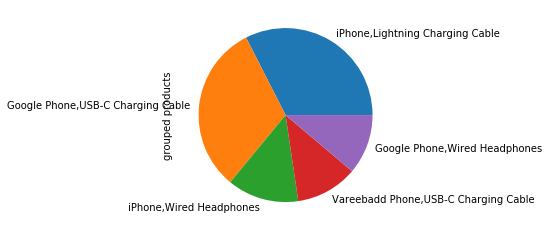

In [114]:
top_5.plot(kind='pie')